Before starting make sure to attach a kernal with numpy and matplotlib installed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Introduction
For our esitmation of pi, we are using the Monte Carlo method. [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#:~:text=Monte%20Carlo%20methods%2C%20or%20Monte,might%20be%20deterministic%20in%20principle.) has a verbose article and was the main source I used in the creation of my algoithm. Monte Carlo methods tend to follow a pattern of first defining a domain of possible inputs, generating inputs from some proability distribution over the domain, performing some deterministic computation of the outputs and finally aggregating the results. 

# Approximating $\pi$

Define domain $D = \{(x,y) \in \mathbb{R}^2 | -1 \le x \le 1 \text{ and } -1 \le y \le 1 \} $. 

Define n to be the amount of points containted in D and r to be the amount of points within an inscribed unit circle. 

By assuming that the ratio's of surface area should relate to the ratio of points r and n we have the approximation. 

$\frac{\pi}{4}\approx \frac{r}{n}$

$\pi \approx \frac{4 * r}{n}$

In [ ]:
#Monte Carlo pi estimator
def estimate_pi(n):
    #Create random points within unit square
    x = np.random.uniform(-1,1,n)
    y = np.random.uniform(-1,1,n)
    
    #Get sum of all points where the distance from center 
    # is less than 1 (inside unit circle)
    r = np.sum(np.sqrt((x)**2+(y)**2)<1)

    return 4 * r / n

In [ ]:
#Part 2 Convergence with n_range
#make n_range by estimation type array to store pi estimates for differnt functions

n_range = np.logspace(2, 8, num = 100, base=10, dtype = 'int64')
est_pi_list = np.zeros((100,), dtype=np.float64)
error_list = np.zeros((100,), dtype=np.float64)

for i, n in enumerate(n_range):
    est_pi = estimate_pi(n)
    est_pi_list[i] = est_pi
    error_list[i] = abs(est_pi - pi)

#Plotting results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_range, est_pi_list, label='Estimated Pi')
plt.axhline(y=pi, color='r', linestyle='--', label='Actual Pi')
plt.xscale('log')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Pi Value')
plt.title('Monte Carlo Pi Estimation')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(n_range, error_list, label='Absolute Error', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Absolute Error')
plt.title('Error in Pi Estimation')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [75]:
def RSamplesOfPi(r, n):
    rOfN = np.zeros((r,))
    for i in range(r):
        rOfN[i] = estimate_pi(n)
    return rOfN

Sample 1 Mean: 3.1431360000000006, Std Dev: 0.050876689200458035
Sample 2 Mean: 3.1418008, Std Dev: 0.0160521051379562
Sample 3 Mean: 3.1418545599999996, Std Dev: 0.004843710231465132
Sample 4 Mean: 3.1416013279999997, Std Dev: 0.001634509099520707


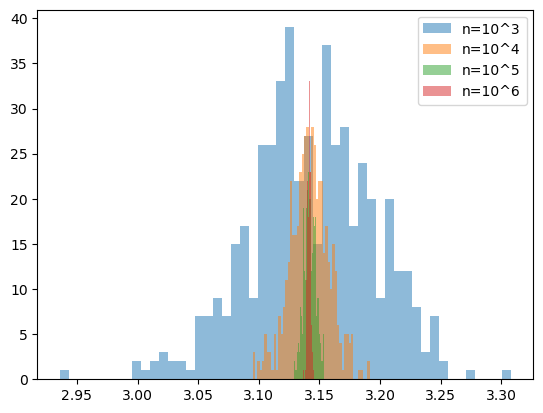

In [80]:

sample1 = np.array(RSamplesOfPi(500,10**3))
sample2 = np.array(RSamplesOfPi(500,10**4))
sample3 = np.array(RSamplesOfPi(500,10**5))
sample4 = np.array(RSamplesOfPi(500,10**6))

print(f"Sample 1 Mean: {np.mean(sample1)}, Std Dev: {np.std(sample1)}")
print(f"Sample 2 Mean: {np.mean(sample2)}, Std Dev: {np.std(sample2)}")
print(f"Sample 3 Mean: {np.mean(sample3)}, Std Dev: {np.std(sample3)}")
print(f"Sample 4 Mean: {np.mean(sample4)}, Std Dev: {np.std(sample4)}")

plt.hist(sample1, bins=50, alpha=0.5, label='n=10^3')
plt.hist(sample2, bins=50, alpha=0.5, label='n=10^4')
plt.hist(sample3, bins=50, alpha=0.5, label='n=10^5')
plt.hist(sample4, bins=50, alpha=0.5, label='n=10^6')
plt.legend()
plt.show()
